# PART 1

## Step 1

### Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column

In [3]:
# Import libraries and data

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# define a path folder
path = r'C:\Users\jeanclaude\Instacart Basket Analysis'

In [5]:
# Import ords_prods_cust
df_ords_prods_merged =  pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','orders_products_customers_updated.pkl'))

In [6]:
df_ords_prods_merged.shape

(32434212, 36)

## Step 2

### Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [7]:
pd.options.display.max_columns = None
df_ords_prods_merged.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,average_price,median_prior_orders,order_frequency_flag,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,NaN,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,6.367797,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,6.367797,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,6.367797,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,6.367797,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,6.367797,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [8]:
# Drop 'first_name' and 'surname' columns to remove PII

columns_to_drop = ['First Name', 'Surnam']

In [9]:
df_ords_prods_merged = df_ords_prods_merged.drop(columns=columns_to_drop)

In [10]:
df_ords_prods_merged.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,average_price,median_prior_orders,order_frequency_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,NaN,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


## Step 3 

### The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

#### 3.1 Create Region Colomn

In [11]:
# Assign state values to region variables

Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [12]:
# Assign States in 'state' column to a region

df_ords_prods_merged.loc[df_ords_prods_merged['STATE'].isin(Northeast), 'region'] = 'Northeast'
df_ords_prods_merged.loc[df_ords_prods_merged['STATE'].isin(Midwest), 'region'] = 'Midwest'
df_ords_prods_merged.loc[df_ords_prods_merged['STATE'].isin(South), 'region'] = 'South'
df_ords_prods_merged.loc[df_ords_prods_merged['STATE'].isin(West), 'region'] = 'West'

In [13]:
#Check if Region was added
pd.options.display.max_columns = None
df_ords_prods_merged.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,average_price,median_prior_orders,order_frequency_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,region
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,NaN,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South


In [14]:
# Check frequency of regions column

df_ords_prods_merged['region'].value_counts(dropna = False)

South        10801610
West          8300445
Midwest       7603810
Northeast     5728347
Name: region, dtype: int64

#### 3.2 Determine whether there’s a difference in spending habits between the different U.S. regions. 

In [15]:
# Create crosstab of regions and spending flag columns

crosstab = pd.crosstab(df_ords_prods_merged['region'], df_ords_prods_merged['spending_flag'], dropna = False)

In [16]:
# Check the values

crosstab.head()

spending_flag,High spender,Low spender
region,,
Midwest,156129,7447681
Northeast,108343,5620004
South,210182,10591428
West,160807,8139638


#### From the above findings between the differnet Regions the High spender and Low Spender flags are both similar as a percentage of there totals within each Region. Altough High spenders amount to just 2% of spending compared to that of Low spenders amounting to 98% of all spending

#### Midwest - High Spender (24.56%) Midwest - Low Spender (23.42%)
#### Northeast - High Spender (17.04%) Northeast - Low Spender (17.67%)
#### South - High Spender (33.07%) South - Low Spender (33.30%)
#### West - High Spender (25.30%) West - Low Spender (25.59%)

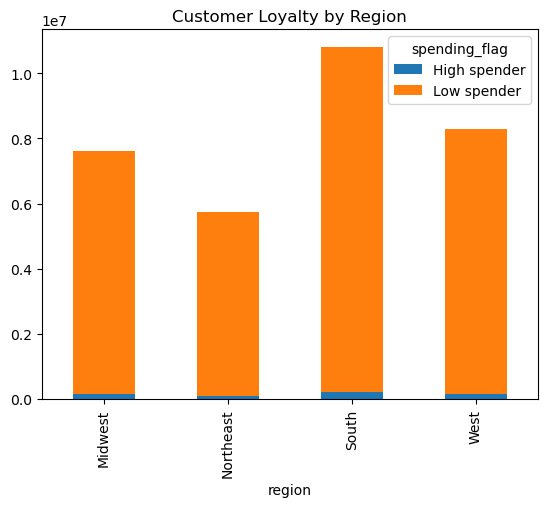

In [17]:
# stacked bar chart of 'regions' x 'loyalty_flag' 

bar_stacked_regionxloyalty = crosstab.plot.bar(stacked = True, title = 'Customer Loyalty by Region')

In [100]:
bar_stacked_regionxloyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'regions and loyalty.png'),bbox_inches='tight')

## Step 4 
### The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [19]:
# for-loop if-statement: assign 'drop' to customers with <=5 'max_order'

result = []

for max_order in df_ords_prods_merged['max_order']:
  if max_order <=5:
    result.append('exclude')
  else:
    result.append('keep')

In [20]:
# input result in new column named 'low_activity_customers'

df_ords_prods_merged['low_activity_customers'] = result

In [21]:
# check if new column was added
df_ords_prods_merged.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,average_price,median_prior_orders,order_frequency_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,region,low_activity_customers
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,NaN,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,keep
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,keep
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,keep
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,keep
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,keep


In [22]:
# counting keep vs exclude 

df_ords_prods_merged['low_activity_customers'].value_counts()

keep       30198831
exclude     2235381
Name: low_activity_customers, dtype: int64

In [23]:
# creating a subset dataframe for what to "exclude"

exclude = df_ords_prods_merged.loc[df_ords_prods_merged['low_activity_customers']=='exclude']

In [24]:
# check if the subset is correct
exclude.shape

(2235381, 36)

In [25]:
# exporting subset dataframe for what to "exclude"

exclude.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers_updated_exclude.pkl'))

In [26]:
# creating a subset dataframe for what to "keep"

keep = df_ords_prods_merged.loc[df_ords_prods_merged['low_activity_customers']=='keep']

In [27]:
# check if the subset is correct
keep.shape

(30198831, 36)

In [28]:
# exporting subset dataframe for what to "keep"

keep.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers_updated_keep.pkl'))

## Step 5
### The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

### 5.1 Profiling age groups

In [33]:
# for-loop if-statement: assign groups to age

result = [] 

for Age in keep['Age']:
  if Age >18 and Age <=24:
    result.append('18-24')
  elif Age <=34:
    result.append('25-34')
  elif Age <=44:
    result.append('35-44')
  elif Age <=54:
    result.append('45-54')
  elif Age <=64:
    result.append('55-64')
  elif Age >=65:
    result.append('65+')
  else:
    result.append('error')

In [34]:
# input result in new column named 'age_group'

keep.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,average_price,median_prior_orders,order_frequency_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,region,low_activity_customers
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,NaN,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,keep
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,keep
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,keep
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,keep
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,keep


In [45]:
# input result in new column named 'age_group'

keep['age_group'] = result

In [47]:
# count of each group 

keep['age_group'].value_counts().sort_index()

18-24    2863486
25-34    5174711
35-44    4717028
45-54    4764253
55-64    4682612
65+      7996741
Name: age_group, dtype: int64

### 5.2 Profiling family structure

In [48]:
# group by combinations of 'fam_status', 'num_of_dependants', 'age_group' and count occurrences

keep.groupby(['age_group', 'fam_status', 'n_dependants']).size()

age_group  fam_status                        n_dependants
18-24      living with parents and siblings  1                375546
                                             2                365212
                                             3                354011
           married                           1                365856
                                             2                342931
                                             3                372284
           single                            0                687646
25-34      living with parents and siblings  1                120668
                                             2                107447
                                             3                122599
           married                           1               1136904
                                             2               1192570
                                             3               1170895
           single                            

In [49]:
# Creating family type groupings

keep.loc[(keep['fam_status'].isin(['divorced/widowed', 'living with parents and siblings', 'single'])) & (keep['n_dependants'] == 0), 'family_type'] = 'single no dependants'
keep.loc[(keep['fam_status'].isin(['divorced/widowed', 'living with parents and siblings', 'single'])) & (keep['n_dependants'] > 0), 'family_type'] = 'single with dependants'
keep.loc[(keep['fam_status'] == 'married') & (keep['n_dependants'] == 1), 'family_type'] = 'married no dependants'
keep.loc[(keep['fam_status'] == 'married') & (keep['n_dependants'] > 1), 'family_type'] = 'married with dependants'

In [50]:
# count of each family type 

keep['family_type'].value_counts()

married with dependants    14172840
single no dependants        7546387
married no dependants       7034121
single with dependants      1445483
Name: family_type, dtype: int64

In [51]:
# Check if colomn has been added

keep.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,average_price,median_prior_orders,order_frequency_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,region,low_activity_customers,age_group,family_type
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,NaN,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,keep,25-34,married with dependants
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,keep,25-34,married with dependants
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,keep,25-34,married with dependants
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,keep,25-34,married with dependants
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,keep,25-34,married with dependants


### 5.3 Profiling income

In [52]:
# Minimum income
keep.income.min()


25903

In [53]:
# Mximum income
keep.income.max()

593901

In [54]:
# Income breakdown for working, middle, upper and high wealth

keep.loc[keep['income'] <= 75000, 'income_group'] = 'Working'
keep.loc[(keep['income'] > 75000) & (keep['income'] < 120001), 'income_group'] = 'Middle'
keep.loc[(keep['income'] > 120000) & (keep['income'] < 400001), 'income_group'] = 'Upper'
keep.loc[keep['income'] > 400000, 'income_group'] = 'High Wealth'

In [55]:
# Checking that total of column values equals total rows in pickle

keep['income_group'].value_counts(dropna = False)

Middle         11598040
Working         9634914
Upper           8919471
High Wealth       46406
Name: income_group, dtype: int64

In [56]:
# Check colomns
keep.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,average_price,median_prior_orders,order_frequency_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,region,low_activity_customers,age_group,family_type,income_group
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,NaN,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,keep,25-34,married with dependants,Working
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,keep,25-34,married with dependants,Working
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,keep,25-34,married with dependants,Working
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,keep,25-34,married with dependants,Working
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,keep,25-34,married with dependants,Working


### 5.3 Profiling Goods in departments

In [57]:
keep['department_id'].value_counts(dropna = False)

4     8859947
16    5067742
19    2699351
7     2507273
1     2060883
13    1732302
3     1096599
15     982041
20     978050
9      797683
17     678296
14     660469
12     655733
11     411915
18     403066
6      248722
5      139618
8       90344
21      62541
2       33415
10      32841
Name: department_id, dtype: int64

In [58]:
# Importing department data

depts = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [59]:
# for-loop if-statement: assign names department

result2 = [] 

for department_id in keep['department_id']:
  if department_id == 1:
    result2.append('frozen')
  elif department_id == 2:
    result2.append('other')
  elif department_id == 3:
    result2.append('bakery')
  elif department_id == 4:
    result2.append('produce')
  elif department_id == 5:
    result2.append('alcohol')
  elif department_id == 6:
    result2.append('international')
  elif department_id == 7:
    result2.append('beverages')
  elif department_id == 8:
    result2.append('pets')
  elif department_id == 9:
    result2.append('dry goods pasta')
  elif department_id == 10:
    result2.append('bulk')
  elif department_id == 11:
    result2.append('personal care')
  elif department_id == 12:
    result2.append('meat seafood')
  elif department_id == 13:
    result2.append('pantry')
  elif department_id == 14:
    result2.append('breakfast')
  elif department_id == 15:
    result2.append('canned goods')
  elif department_id == 16:
    result2.append('dairy eggs')    
  elif department_id == 17:
    result2.append('household')
  elif department_id == 18:
    result2.append('babies')
  elif department_id == 19:
    result2.append('snacks')
  elif department_id == 20:
    result2.append('deli')
  elif department_id == 20:
    result2.append('missing')
  else:
    result2.append('error')

In [60]:
# input result in new column named 'department_name'

keep['department_name'] = result2

In [61]:
keep.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,average_price,median_prior_orders,order_frequency_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,region,low_activity_customers,age_group,family_type,income_group,department_name
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,NaN,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,keep,25-34,married with dependants,Working,beverages
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,keep,25-34,married with dependants,Working,beverages
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,keep,25-34,married with dependants,Working,beverages
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,keep,25-34,married with dependants,Working,beverages
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,keep,25-34,married with dependants,Working,beverages


In [62]:
# count of each name 

keep['department_name'].value_counts().sort_index()

alcohol             139618
babies              403066
bakery             1096599
beverages          2507273
breakfast           660469
bulk                 32841
canned goods        982041
dairy eggs         5067742
deli                978050
dry goods pasta     797683
error                62541
frozen             2060883
household           678296
international       248722
meat seafood        655733
other                33415
pantry             1732302
personal care       411915
pets                 90344
produce            8859947
snacks             2699351
Name: department_name, dtype: int64

Produce, dairy eggs, snacks, beverages and frozen are amoungst the most values

## Step 6
### Create an appropriate visualization to show the distribution of profiles.

Text(0.5, 1.0, 'Distribution of orders by age group')

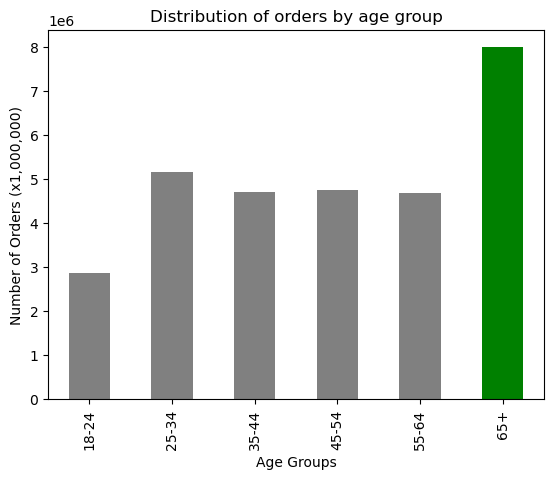

In [63]:
# bar chart for 'age_group'

ord_age = keep['age_group'].value_counts().sort_index().plot.bar(color=['gray','gray','gray','gray','gray','green'])

plt.xlabel('Age Groups')
plt.ylabel('Number of Orders (x1,000,000)')
plt.title('Distribution of orders by age group')

#### Age groups 65 years and older make up the highest percentage of orders

Text(0.5, 1.0, 'Distribution of orders by Family Status')

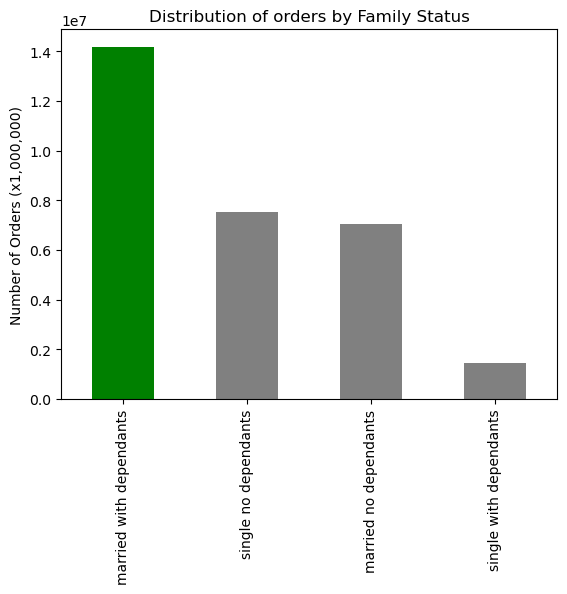

In [64]:
# bar chart for 'fam_structure'

fam_dis = keep['family_type'].value_counts().plot.bar(color=['green','gray','gray','gray'])

plt.ylabel('Number of Orders (x1,000,000)')
plt.title('Distribution of orders by Family Status')

#### Married with dependants family status makes up the highest percentage of orders

Text(0.5, 1.0, 'Distribution of orders by Income Group')

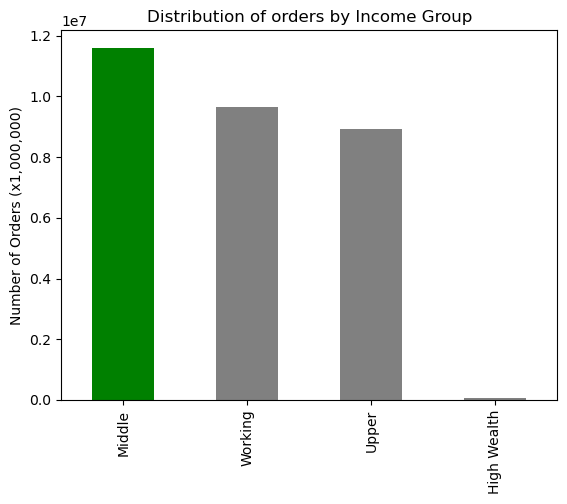

In [65]:
# bar chart for income groups

income_spread = keep['income_group'].value_counts().plot.bar(color=['green','gray','gray','gray'])

plt.ylabel('Number of Orders (x1,000,000)')
plt.title('Distribution of orders by Income Group')

Text(0.5, 1.0, 'Distribution of orders by Department')

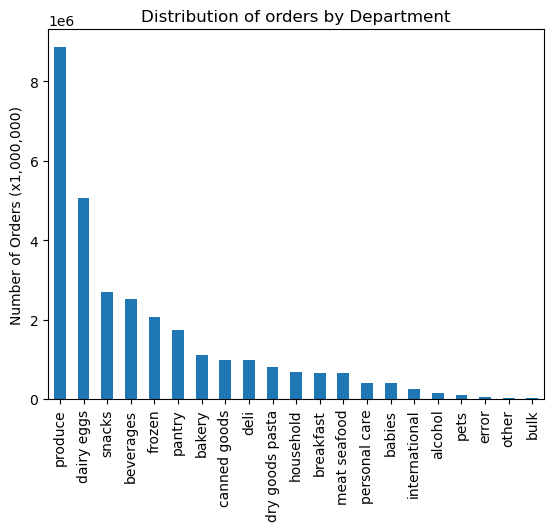

In [66]:
# bar chart for departments

dept = keep['department_name'].value_counts().plot.bar()

plt.ylabel('Number of Orders (x1,000,000)')
plt.title('Distribution of orders by Department')

Produce, dairy eggs, snacks, beverages and frozen are amoungst the most values

In [99]:
# Saving my Visualisations
ord_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'orders by age group.png'),bbox_inches='tight')
fam_dis.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'orders by family status.png'),bbox_inches='tight')
income_spread.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'orders by income.png'),bbox_inches='tight')
dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Distribution of orders by Department.png'),bbox_inches='tight')

## Step 7
### Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [68]:
# usage frequency: mean, min, max of 'days_since_prior_order' grouped by 'age_group'

keep.groupby('age_group').agg({'days_since_prior_order': ['mean', 'median', 'min', 'max']})

days_since_prior_order                  
                            mean median  min   max
age_group                                         
18-24                  10.554634    7.0  0.0  30.0
25-34                  10.698333    7.0  0.0  30.0
35-44                  10.611472    7.0  0.0  30.0
45-54                  10.618456    7.0  0.0  30.0
55-64                  10.673432    7.0  0.0  30.0
65+                    10.619159    7.0  0.0  30.0

In [69]:
# usage prices: mean, min, max of 'days_since_prior_order' grouped by 'age_group'

keep.groupby('age_group').agg({'prices': ['mean', 'median', 'min', 'max']})

prices                     
                mean median  min      max
age_group                                
18-24      12.638207    7.4  1.0  99999.0
25-34      11.662075    7.4  1.0  99999.0
35-44      11.471552    7.4  1.0  99999.0
45-54      11.928986    7.4  1.0  99999.0
55-64      12.217758    7.4  1.0  99999.0
65+        11.684339    7.4  1.0  99999.0

In [70]:
# usage frequency: mean, min, max of 'days_since_prior_order' grouped by 'family_type'

keep.groupby('family_type').agg({'days_since_prior_order': ['mean', 'median', 'min', 'max']})

days_since_prior_order                  
                                          mean median  min   max
family_type                                                     
married no dependants                10.641720    7.0  0.0  30.0
married with dependants              10.647881    7.0  0.0  30.0
single no dependants                 10.609966    7.0  0.0  30.0
single with dependants               10.579771    7.0  0.0  30.0

In [71]:
# usage prices: mean, min, max of 'days_since_prior_order' grouped by 'family_type'

keep.groupby('family_type').agg({'prices': ['mean', 'median', 'min', 'max']})

prices                     
                              mean median  min      max
family_type                                            
married no dependants    11.529109    7.4  1.0  99999.0
married with dependants  12.025971    7.4  1.0  99999.0
single no dependants     12.082790    7.4  1.0  99999.0
single with dependants   10.659726    7.4  1.0  99999.0

In [72]:
# usage frequency: mean, min, max of 'days_since_prior_order' grouped by 'income_group'

keep.groupby('income_group').agg({'days_since_prior_order': ['mean', 'median', 'min', 'max']})

days_since_prior_order                  
                               mean median  min   max
income_group                                         
High Wealth               10.279477    7.0  0.0  30.0
Middle                    10.605065    7.0  0.0  30.0
Upper                     10.596373    7.0  0.0  30.0
Working                   10.704540    7.0  0.0  30.0

In [73]:
# usage prices: mean, min, max of 'days_since_prior_order' grouped by 'income_group'

keep.groupby('income_group').agg({'prices': ['mean', 'median', 'min', 'max']})

prices                     
                    mean median  min      max
income_group                                 
High Wealth   217.886821    7.3  1.0  99999.0
Middle          9.398596    7.7  1.0  99999.0
Upper          18.739618    7.7  1.0  99999.0
Working         7.458827    6.9  1.0  14900.0

In [74]:
# usage frequency: mean, min, max of 'days_since_prior_order' grouped by 'department_name'

keep.groupby('department_name').agg({'days_since_prior_order': ['mean', 'median', 'min', 'max']})

days_since_prior_order                  
                                  mean median  min   max
department_name                                         
alcohol                       9.783105    7.0  0.0  30.0
babies                        9.659145    7.0  0.0  30.0
bakery                       10.630573    7.0  0.0  30.0
beverages                    10.594819    7.0  0.0  30.0
breakfast                    10.825845    8.0  0.0  30.0
bulk                          9.742080    7.0  0.0  30.0
canned goods                 11.121176    8.0  0.0  30.0
dairy eggs                   10.540505    7.0  0.0  30.0
deli                         10.878051    8.0  0.0  30.0
dry goods pasta              11.241905    8.0  0.0  30.0
error                         9.700833    7.0  0.0  30.0
frozen                       11.220586    8.0  0.0  30.0
household                    11.437242    8.0  0.0  30.0
international                10.773623    7.0  0.0  30.0
meat seafood                 10.935665    8.0  0.0  30.0
other                        10.430600    7.0  0.0  30.0
pantry                       10.639741    7.0  0.0  30.0
personal care                11.057856    8.0  0.0  30.0
pets                         11.424850    8.0  0.0  30.0
produce                      10.405501    7.0  0.0  30.0
snacks                       10.504081    7.0  0.0  30.0

In [75]:
# usage prices: mean, min, max of 'days_since_prior_order' grouped by 'department_name'

keep.groupby('department_name').agg({'prices': ['mean', 'median', 'min', 'max']})

prices                     
                      mean median  min      max
department_name                                
alcohol           8.154166    7.5  1.0     15.0
babies            7.630199    7.2  1.0     15.0
bakery            7.872081    7.5  1.0     15.0
beverages         7.684264    7.7  1.0     15.0
breakfast         8.068093    8.5  1.0     14.9
bulk              8.343708    6.1  1.4     14.1
canned goods      7.549985    6.9  1.0     15.0
dairy eggs       32.572336    8.8  1.0  99999.0
deli              7.786115    7.5  1.0     15.0
dry goods pasta   7.346977    6.9  1.0     15.0
error             8.661264    8.4  1.0     15.0
frozen            7.736845    7.8  1.0     15.0
household         7.376049    7.4  1.0     15.0
international     7.678460    6.9  1.0     15.0
meat seafood     16.300487   17.1  8.0     25.0
other             6.944558    6.5  1.1     15.0
pantry            8.015765    7.9  1.0     20.0
personal care     7.999352    7.9  1.0     15.0
pets              7.887766    7.6  1.0     15.0
produce           7.979722    7.9  1.0     15.0
snacks            4.275691    4.2  1.6      7.0

## Step 8 and 9

### 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

### 9. Produce suitable charts to illustrate your results and export them in your project folder.

### Age by Region

In [76]:
# Checking age by region stats

age_by_region = pd.crosstab(keep['age_group'],keep['region'], dropna = False)

In [77]:
age_by_region

region,Midwest,Northeast,South,West
age_group,,,,
18-24,670729,508553,975933,708271
25-34,1194257,922872,1724397,1333185
35-44,1131449,792507,1599249,1193823
45-54,1129026,851604,1547241,1236382
55-64,1096590,805302,1568749,1211971
65+,1854091,1448751,2643676,2050223


In [78]:
# Setting color variable

region_colors = ['lightgreen', 'gray', 'pink', 'mediumturquoise']

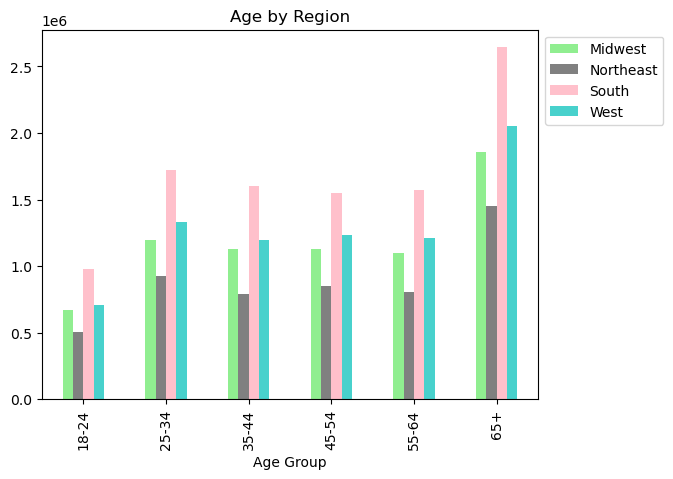

In [79]:
# Vizualizing relationship

age_region_bar = age_by_region.plot.bar(color = region_colors)
plt.title("Age by Region")
plt.xlabel("Age Group")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [98]:
# Saving my Visualisations
age_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Age by Region.png'),bbox_inches='tight')

### Family status by Region

In [81]:
# Checking family status by region

fam_by_region = pd.crosstab(keep['family_type'],keep['region'], dropna = False)

In [82]:
fam_by_region

region,Midwest,Northeast,South,West
family_type,,,,
married no dependants,1677571,1259833,2309683,1787034
married with dependants,3280034,2501075,4737268,3654463
single no dependants,1775601,1318442,2519129,1933215
single with dependants,342936,250239,493165,359143


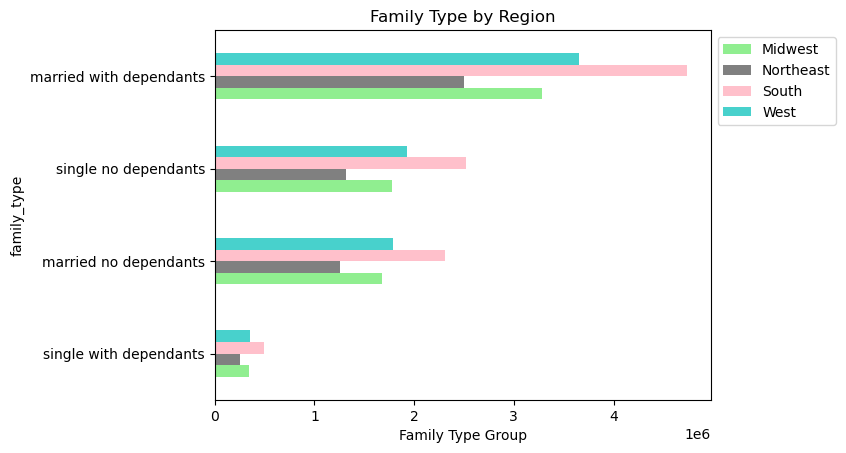

In [83]:
# Vizualizing relationship

fam_by_region_bar = fam_by_region.sort_values(by=['West'], ascending=True).plot.barh(color = region_colors)
plt.title("Family Type by Region")
plt.xlabel("Family Type Group")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [97]:
# Saving my Visualisations
fam_by_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fam_by_region_bar.png'),bbox_inches='tight')

### Income by Region

In [85]:
# Checking Income  by region

income_check = pd.crosstab(keep['income_group'],keep['region'], dropna = False)

In [86]:
income_check

region,Midwest,Northeast,South,West
income_group,,,,
High Wealth,16388,6541,11994,11483
Middle,2704330,2058097,3880225,2955388
Upper,2118332,1585070,2943576,2272493
Working,2237092,1679881,3223450,2494491


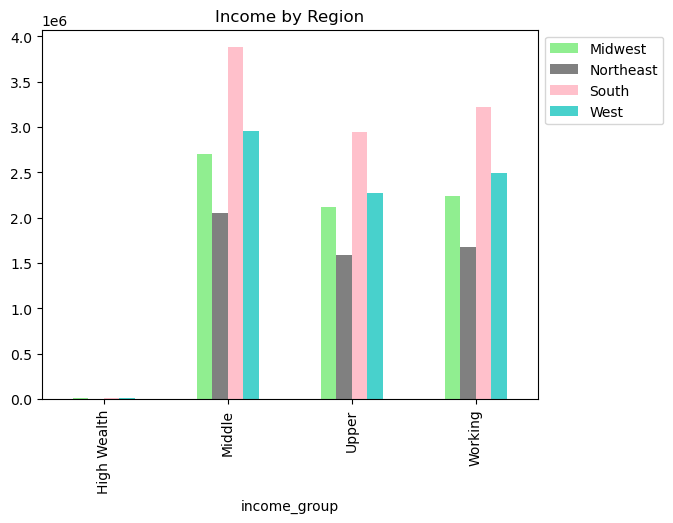

In [87]:
# Vizualizing relationship

income_check_bar = income_check.plot.bar(color = region_colors)
plt.title("Income by Region")
plt.xlabel("income_group")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [95]:
# Saving my Visualisations
income_check_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_check_bar.png'),bbox_inches='tight')

### Departments by Region

In [89]:
# Checking departments by region

depart_by_region = pd.crosstab(keep['department_name'],keep['region'], dropna = False)

In [90]:
depart_by_region

region,Midwest,Northeast,South,West
department_name,,,,
alcohol,32892,24131,47077,35518
babies,94027,71370,136961,100708
bakery,255922,194897,363603,282177
beverages,583238,451676,837804,634555
breakfast,153432,116098,219840,171099
bulk,7806,5482,10953,8600
canned goods,230173,171517,327746,252605
dairy eggs,1186211,895208,1687137,1299186
deli,228200,173837,325082,250931


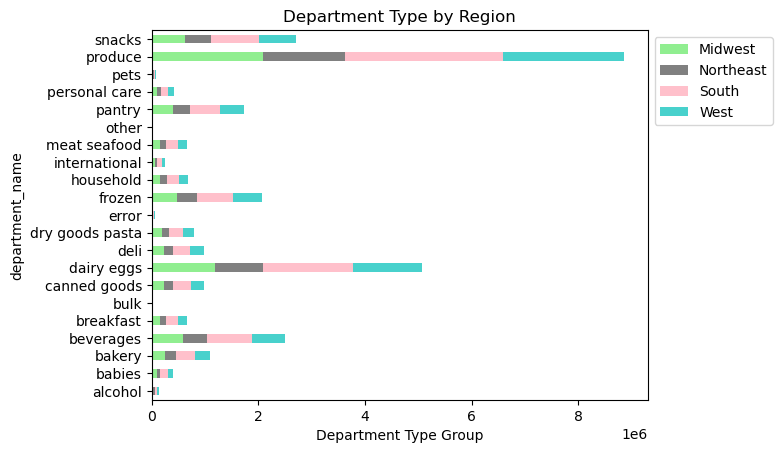

In [91]:
# Vizualizing relationship

depart_by_region_bar = depart_by_region.sort_values(by=['department_name'], ascending=True).plot.barh(color = region_colors,  stacked = True)
plt.title("Department Type by Region")
plt.xlabel("Department Type Group")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [96]:
# Saving my Visualisations
depart_by_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'depart_by_region_bar.png'),bbox_inches='tight')

## Step 10
### Export final data

In [93]:
# exporting opc_mkss with new age_income_status and income_status 

keep.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers_merged_keep.pkl'))

In [94]:
keep.shape

(30198831, 40)